## Import packages necessary for the analysis

In [52]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from scipy import stats

## Load GEOS Data

In [2]:
ds_ci = xr.open_dataset('../data/ai_ready/CloudImageryDataset.nc')
ds_co = xr.open_dataset('../data/ai_ready/CloudOpticalDepthDataset.nc')
ds_sw = xr.open_dataset('../data/ai_ready/ReflectedSWDataset.nc')

In [24]:
CID = ds_ci['CloudImagery']
COD = ds_co['CloudOpticalDepth']
RSW = ds_sw['ReflectedSW']

In [25]:
def crop_da(ds,min_lon,max_lon,min_lat,max_lat):

    mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
    mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)

    ds = ds.where(mask_lon & mask_lat, drop=True)
    return ds

In [ ]:
def rgb_to_grayscale(da):
    """Converts an RGB xarray DataArray to grayscale."""
    return (da.sel(rgb='red') * 0.2989 + 
            da.sel(rgb='green') * 0.5870 + 
            da.sel(rgb='blue') * 0.1140)

grayscale_CID = rgb_to_grayscale(CID)

In [26]:
# Make the shapes of CID and COD same

LatIndexer, LonIndexer = 'latitude', 'longitude'
min_lon,max_lon,min_lat,max_lat= -125., -114., 32., 42.

COD = crop_da(COD,min_lon,max_lon,min_lat,max_lat)
CID = crop_da(CID,min_lon,max_lon,min_lat,max_lat)
RSW = crop_da(RSW,min_lon,max_lon,min_lat,max_lat)

# Variables for each RGB
CIDR = CID.sel(rgb='red')
CIDG = CID.sel(rgb='green')
CIDB = CID.sel(rgb='blue')

In [69]:

# DataFrame containing all the variables
df = pd.DataFrame({'cod':np.log(COD.data.flatten()),
              'cidr': CIDR.data.flatten(),
              'cidg': CIDG.data.flatten(),
              'cidb': CIDB.data.flatten(),
              })
df.dropna(inplace=True)
df = df.loc[~((df.cidr==0)|(df.cidr==0)|(df.cidr==0)) & (df.cod>0) & (df.cod<5.1) ]

# df
# scaler = StandardScaler()
# df=pd.DataFrame(scaler.fit_transform(df))
df

,cod,cidr,cidg,cidb
434,2.773046,0.661726,0.693735,0.721684
859,2.960794,0.666913,0.698822,0.727419
860,3.456461,0.697953,0.727059,0.751058
861,3.219944,0.685603,0.715007,0.739973
862,3.443126,0.701938,0.730789,0.753697
...,...,...,...,...
1765237,2.061426,0.628268,0.649570,0.664797
1765238,2.262831,0.639737,0.660771,0.674833
1765239,2.291877,0.641215,0.662506,0.676912
1765240,2.652246,0.659591,0.679757,0.692372


## 2D plots of ReflectedSW, Cloud Image, and Cloud Optical Depth

/Users/jeyunchun/miniconda3/envs/mlgeo_dataset/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/jeyunchun/miniconda3/envs/mlgeo_dataset/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


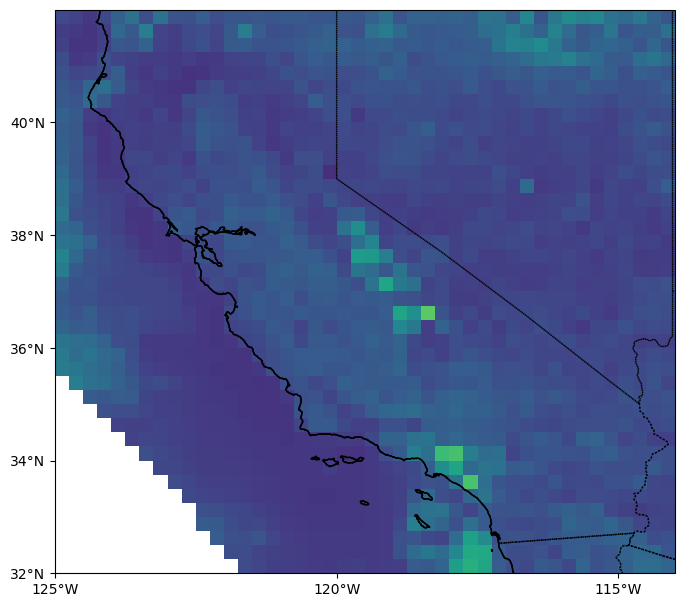

In [45]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.pcolormesh(ds_sw.lon[0,...],ds_sw.lat[0,...], ds_sw['ReflectedSW'][2,...],transform=ccrs.PlateCarree())
axs.set_extent([-125, -114, 32, 42], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-125,-114,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(32,42,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, linestyle=':')

plt.show()



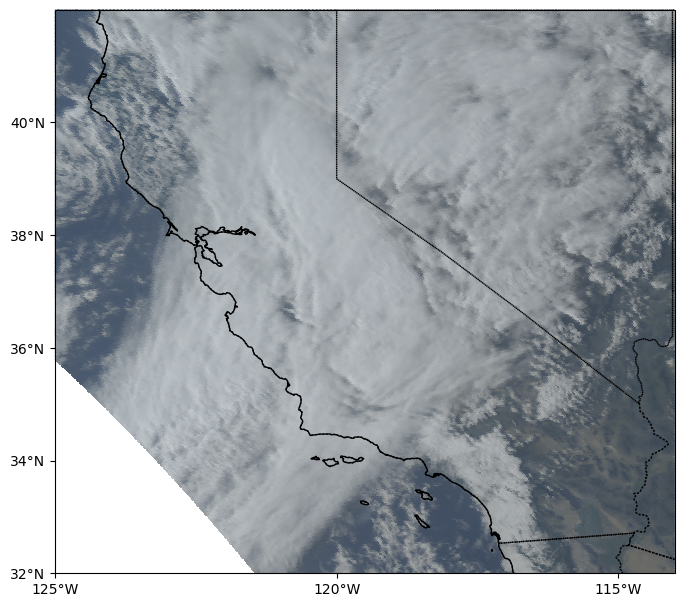

In [46]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plt.pcolormesh(ds_sw.lon[0,...],ds_sw.lat[0,...], ds_sw['ReflectedSW'][0,...],transform=ccrs.PlateCarree())
plt.pcolormesh(ds_ci.lon[0,...],ds_ci.lat[0,...], ds_ci['CloudImagery'][-5,...],transform=ccrs.PlateCarree())
axs.set_extent([-125, -114, 32, 42], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-125,-114,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(32,42,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, linestyle=':')

plt.show()



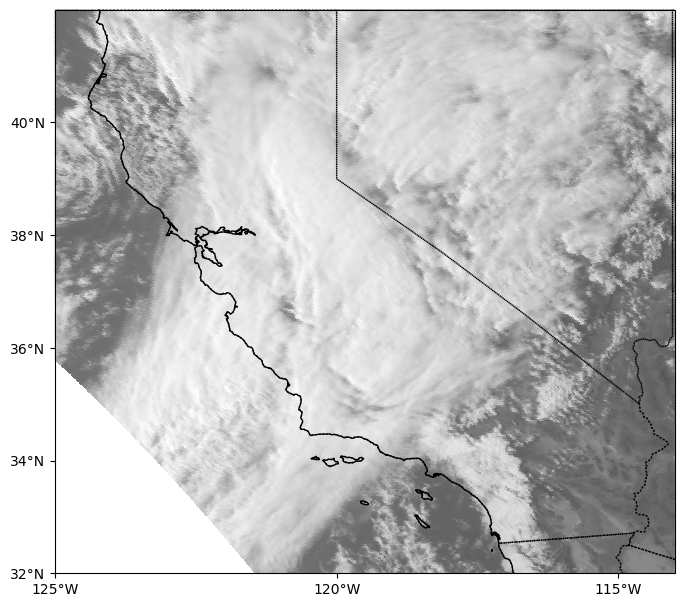

In [47]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# plt.pcolormesh(ds_sw.lon[0,...],ds_sw.lat[0,...], ds_sw['ReflectedSW'][0,...],transform=ccrs.PlateCarree())
plt.pcolormesh(ds_ci.lon[0,...],ds_ci.lat[0,...], grayscale_CID.data[-5,...],transform=ccrs.PlateCarree(),cmap='gray')
axs.set_extent([-125, -114, 32, 42], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-125,-114,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(32,42,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, linestyle=':')

plt.show()



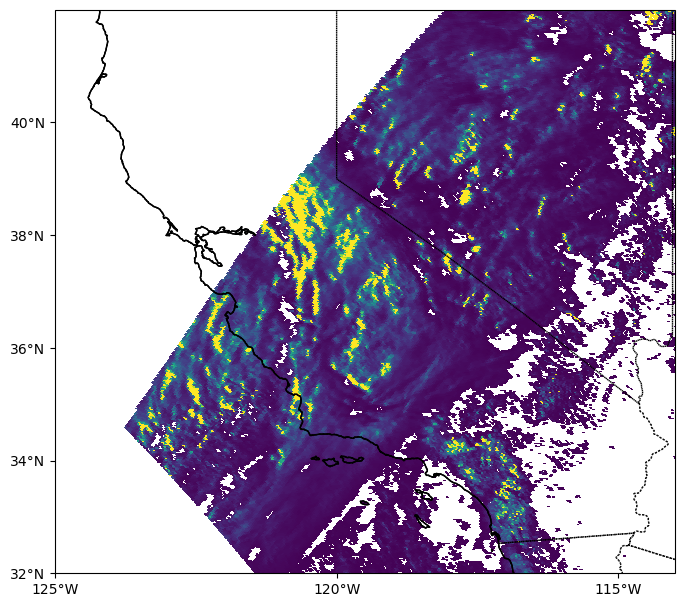

In [48]:
fig = plt.figure(figsize=(8, 10))
axs = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
plt.pcolormesh(ds_co.lon[0,...],ds_co.lat[0,...], ds_co['CloudOpticalDepth'][-5,...],transform=ccrs.PlateCarree())
axs.coastlines()
axs.set_extent([-125, -114, 32, 42], ccrs.PlateCarree())
# Define the xticks for longitude
axs.set_xticks(np.arange(-125,-114,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
axs.set_yticks(np.arange(32,42,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
axs.coastlines(resolution='10m')
axs.add_feature(cfeature.BORDERS, linestyle=':')
axs.add_feature(cfeature.STATES, linestyle=':')

plt.show()



## Statistical Analysis

Text(0, 0.5, 'Frequency')

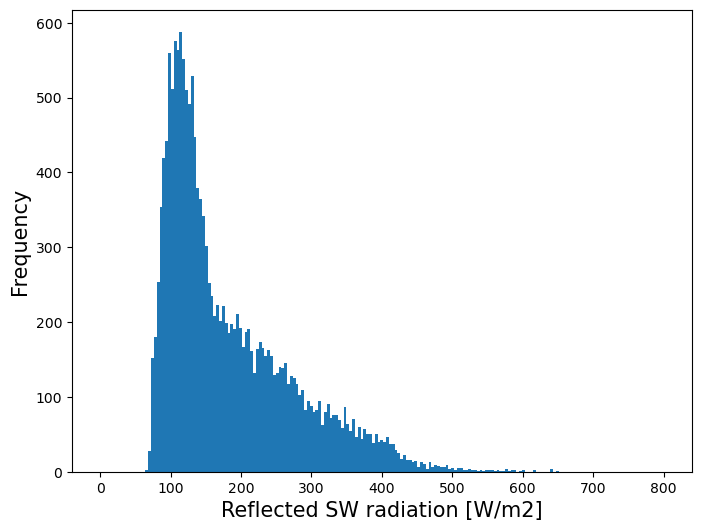

In [28]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
_=axs.hist(RSW.data[~np.isnan(RSW.data)],bins=np.linspace(0,800,200))
axs.set_xlabel('Reflected SW radiation [W/m2]',fontsize=15)
axs.set_ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

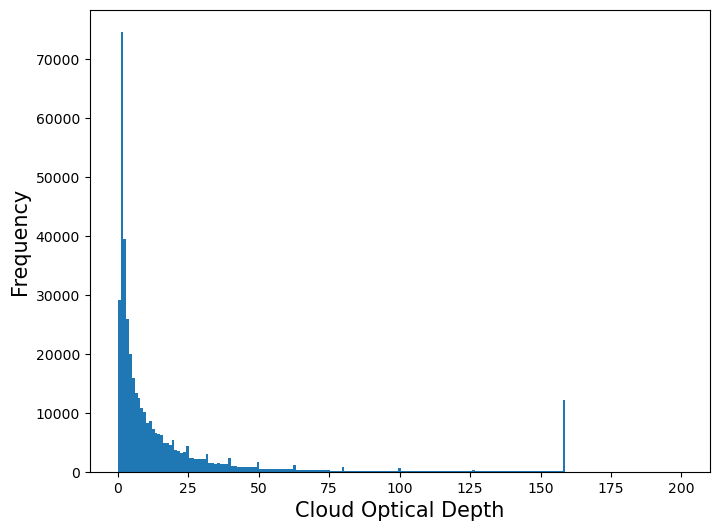

In [29]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
_=axs.hist(COD.data[~np.isnan(COD.data)],bins=np.linspace(0,200,200))
axs.set_xlabel('Cloud Optical Depth',fontsize=15)
axs.set_ylabel('Frequency',fontsize=15)

Text(0, 0.5, 'Frequency')

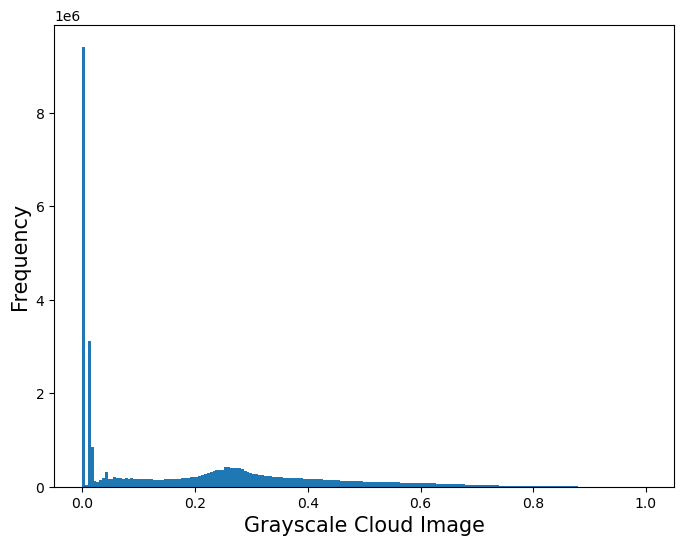

In [30]:
fig,axs=plt.subplots(1,1,figsize=(8,6))
_=axs.hist(grayscale_CID.data[~np.isnan(grayscale_CID.data)],bins=np.linspace(0,1,200))
axs.set_xlabel('Grayscale Cloud Image',fontsize=15)
axs.set_ylabel('Frequency',fontsize=15)

## Relationship between different variables

R2 between RG:  PearsonRResult(statistic=0.9947124356423646, pvalue=0.0)
R2 between GB:  PearsonRResult(statistic=0.9926265999386066, pvalue=0.0)
R2 between BR:  PearsonRResult(statistic=0.9756448115429454, pvalue=0.0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R2 between RG:  PearsonRResult(statistic=0.9977534506321865, pvalue=0.0)
R2 between GB:  PearsonRResult(statistic=0.9938002281885605, pvalue=0.0)
R2 between BR:  PearsonRResult(statistic=0.984971884975528, pvalue=0.0)


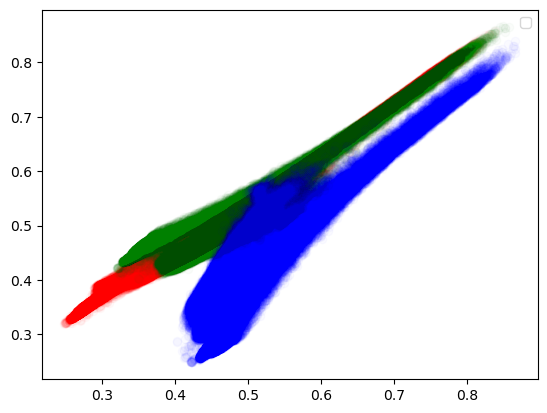

In [70]:
plt.scatter(CIDR.data[0,...].flatten(),CIDG.data[0,...].flatten(),alpha=0.02,c='r')
plt.scatter(CIDG.data[0,...].flatten(),CIDB.data[0,...].flatten(),alpha=0.02,c='g')
plt.scatter(CIDB.data[0,...].flatten(),CIDR.data[0,...].flatten(),alpha=0.02,c='b')
plt.legend()

slope, intercept, r, p, std_err = stats.linregress(CIDR.data.flatten(), CIDG.data.flatten())

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, np.linspace(0,1,10)))

plt.plot(np.linspace(0,1,10), mymodel)

print('R2 between RG: ',stats.pearsonr(df.cidr,df.cidg))
print('R2 between GB: ',stats.pearsonr(df.cidg,df.cidb))
print('R2 between BR: ',stats.pearsonr(df.cidb,df.cidr))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R2 between RG:  PearsonRResult(statistic=0.8935996526296512, pvalue=0.0)
R2 between GB:  PearsonRResult(statistic=0.8969710790311681, pvalue=0.0)
R2 between BR:  PearsonRResult(statistic=0.8943631249214423, pvalue=0.0)


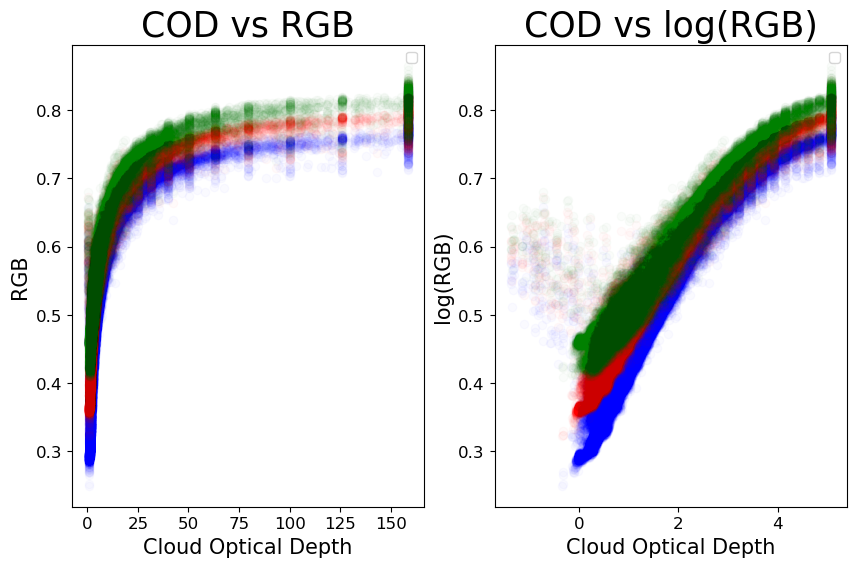

In [72]:
fig,axs=plt.subplots(1,2,figsize=(10,6))

axs[0].scatter(COD.data[0].flatten(),CIDR.data[0].flatten(),alpha=0.02,c='b')
axs[0].scatter(COD.data[0].flatten(),CIDG.data[0].flatten(),alpha=0.02,c='r')
axs[0].scatter(COD.data[0].flatten(),CIDB.data[0].flatten(),alpha=0.02,c='g')
axs[0].legend()
axs[0].set_xlabel("Cloud Optical Depth",fontsize=15)
axs[0].set_ylabel("RGB",fontsize=15)
axs[0].set_title("COD vs RGB",fontsize=25)

axs[1].scatter(np.log(COD.data[0].flatten()),CIDR.data[0].flatten(),alpha=0.02,c='b')
axs[1].scatter(np.log(COD.data[0].flatten()),CIDG.data[0].flatten(),alpha=0.02,c='r')
axs[1].scatter(np.log(COD.data[0].flatten()),CIDB.data[0].flatten(),alpha=0.02,c='g')
axs[1].legend()
axs[1].set_xlabel("Cloud Optical Depth",fontsize=15)
axs[1].set_ylabel("log(RGB)",fontsize=15)
axs[1].set_title("COD vs log(RGB)",fontsize=25)

print('R2 between RG: ',stats.pearsonr(df.cidr,df.cod))
print('R2 between GB: ',stats.pearsonr(df.cidg,df.cod))
print('R2 between BR: ',stats.pearsonr(df.cidb,df.cod))
for ax in axs:
    ax.tick_params(labelsize=12)

## Analysis

- RGB values in Cloud Images are linearly correlated with each other.
- Cloud Optical depth is approximately linearly correlated with log(RGB)

## Challenges
- Human-labeled data is not available yet. The analysis on cloud morphology will be added soon.
- The study area is restricted to around California. Thus, the regression and AI model are possible overfitted to the area.
- Meteorological variables that important to cloud properties (e.g., moisture, temperature, pressure,...) are not included yet. The analysis will be more comprehensive when they are included.
- There are still some invalid data (over population in COD~160). A more precise filtering method is necessary.